# Imports + Download

In [2]:
!pip install texthero

!pip install fasttext

!pip install tensorflow_addons

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import texthero as hero

import tensorflow as tf
import tensorflow_addons as tfa # F1_score
from keras.models import Sequential
from keras import layers

# example of l2 on a dense layer
from keras.regularizers import l2

from keras.utils import np_utils


tf.random.set_seed(2)

     |████████████████████████████████| 1.5 MB 5.9 MB/s 
     |████████████████████████████████| 235 kB 37.4 MB/s 
     |████████████████████████████████| 749 kB 19.1 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 68 kB 3.0 MB/s 
  Using cached pybind11-2.9.2-py2.py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3145260 sha256=b188873567fc0239101fa6f21fe254f25297474c987ab12c5e472b16729356ee
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext
     |████████████████████████████████| 1.1 MB 5.6 MB/s 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


# Preprocessing

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Emotion_final.csv')

# if vs code : df = pd.read_csv('data/Emotion_final.csv')

In [5]:
df = df.sample(5000)
df

,Text,Emotion
12026,i have a headache and feel weepy,sadness
15553,i am still feeling pretty optimistic and confi...,happy
12073,im feeling adventurous i get the philips bette...,happy
20535,The glum look on his face was probably norma,sadness
13290,i didnt need that reminder plus her words made...,sadness
...,...,...
15387,i think we often feel this way about planting ...,fear
4132,i feel inspired to get back to my indigo pot,happy
10732,i can eat plenty of it and feel totally satisf...,happy
15538,when i woke up in the middle of the night beca...,fear


In [37]:
df['clean_text'] = hero.clean(df['Text'])
df['tfidf_clean_text'] = hero.tfidf(df['clean_text'])
df['pca_tfidf_clean_text'] = hero.pca(df['tfidf_clean_text'])

In [38]:
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(["feel","im","feeling","like","really",'know','time','get','little','bit','would','want','think']))
df['clean_text'] = hero.remove_stopwords(df['clean_text'], custom_stopwords)

# df['clean_text'] = hero.remove_digits(df.clean_text)
# df['clean_text'] = hero.remove_punctuation(df.clean_text)
# df['clean_text'] = hero.remove_brackets(df.clean_text)
# df['clean_text'] = hero.remove_diacritics(df.clean_text)
# df['clean_text'] = hero.remove_whitespace(df.clean_text)
# df['clean_text'] = hero.remove_stopwords(df.clean_text)
# df['clean_text'] = hero.clean(df['clean_text'])

In [22]:
df

,Text,Emotion,clean_text,tfidf_clean_text,pca_tfidf_clean_text
12026,i have a headache and feel weepy,0,headache weepy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.06296747679323288, -0.0008457748199068982]"
15553,i am still feeling pretty optimistic and confi...,5,still pretty optimistic confident ability able,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.11841282599328729, -0.08737816369510443]"
12073,im feeling adventurous i get the philips bette...,5,adventurous philips better lemon chicken,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.1699886685099893, 0.02885613935072588]"
20535,The glum look on his face was probably norma,0,glum look face probably norma,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.02346906961096117, -0.050069459071140666]"
13290,i didnt need that reminder plus her words made...,0,didnt need reminder plus words made saw pathetic,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.06993466245642063, -0.02018320934615835]"
...,...,...,...,...,...
15387,i think we often feel this way about planting ...,4,often way planting deeply terrified go deep gr...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.04979624413607837, -0.02750398585891751]"
4132,i feel inspired to get back to my indigo pot,5,inspired back indigo pot,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.04846504594861688, -0.02724555717373142]"
10732,i can eat plenty of it and feel totally satisf...,5,eat plenty totally satisfied dont need underst...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.058419681746778515, 0.00649164791736655]"
15538,when i woke up in the middle of the night beca...,4,woke middle night dream,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.008806751123207298, -0.06000186553482419]"


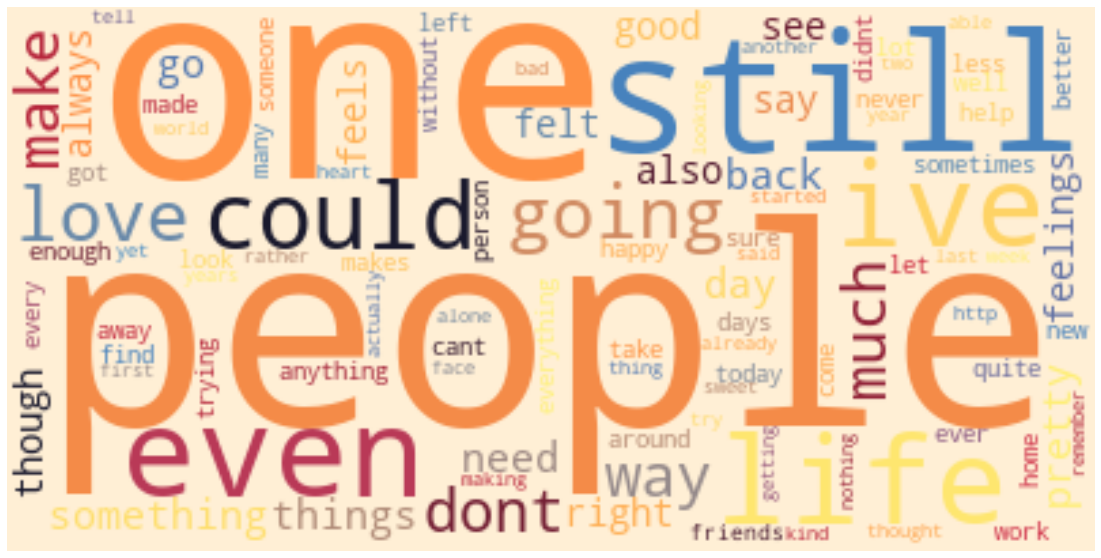

In [23]:
hero.wordcloud(df.clean_text, max_words=100,)

In [24]:
NUM_TOP_WORDS = 10
df.groupby('Emotion')['clean_text'].apply(lambda x: hero.top_words(x)[:NUM_TOP_WORDS])

Emotion             
0        even           62
         life           62
         people         61
         one            61
         ive            59
         dont           51
         still          50
         day            48
         could          44
         going          44
1        people         34
         could          33
         offended       29
         one            29
         still          26
         angry          25
         irritable      23
         even           23
         way            22
         irritated      22
2        love           28
         people         27
         sweet          25
         hot            22
         liked          21
         sympathetic    21
         one            20
         life           20
         much           20
         loving         20
3        funny          23
         weird          17
         shocked        17
         amazed         16
         curious        14
         overwhelmed    13
       

In [10]:
hero.scatterplot(df, col='pca_tfidf_clean_text', color='Emotion', title="Emotion space")

In [25]:
df.loc[df.Emotion == "sadness", 'Emotion'] = 0
df.loc[df.Emotion == "anger", 'Emotion'] = 1
df.loc[df.Emotion == "love", 'Emotion'] = 2
df.loc[df.Emotion == "surprise", 'Emotion'] = 3 
df.loc[df.Emotion == "fear", 'Emotion'] = 4
df.loc[df.Emotion == "happy", 'Emotion'] = 5 

df.Emotion = np.asarray(df.Emotion).astype('int64').reshape((-1,1))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df.clean_text, df.Emotion, train_size=0.85, random_state=2, shuffle=True)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, train_size=0.5, random_state=2, shuffle=True)

In [35]:
vectorizer = CountVectorizer(max_df=0.62, min_df=2)
vectorizer.fit(df.clean_text)


X_train_t = vectorizer.transform(X_train).todense()
X_test_t = vectorizer.transform(X_test).todense()
X_val_t = vectorizer.transform(X_valid).todense()

In [28]:
X_train.shape

(4250,)

In [29]:
y_train.shape

(4250,)

In [30]:
X_test.shape

(375,)

In [31]:
X_valid.shape

(375,)

# model keras

In [39]:
model = Sequential()

initializer = tf.keras.initializers.HeNormal()

model.add(layers.Dense(24,kernel_initializer=initializer, activation="relu"))
# model.add(layers.Embedding(X_train_t.shape[1], 30))
model.add(layers.Dense(6, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=['Accuracy'],
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)

# model.summary()

history= model.fit(
    X_train_t,
    y_train,
    epochs=100,
    batch_size=32,
    callbacks=tf.keras.callbacks.EarlyStopping(patience=3, monitor="val_loss"),
    validation_data=(X_test_t, y_test),
)

Epoch 1/100
133/133 [==============================] - 4s 15ms/step - loss: 1.7812 - Accuracy: 0.2567 - val_loss: 1.7674 - val_Accuracy: 0.3200
Epoch 2/100
133/133 [==============================] - 1s 8ms/step - loss: 1.7507 - Accuracy: 0.3748 - val_loss: 1.7418 - val_Accuracy: 0.3493
Epoch 3/100
133/133 [==============================] - 1s 5ms/step - loss: 1.7154 - Accuracy: 0.3925 - val_loss: 1.7104 - val_Accuracy: 0.3733
Epoch 4/100
133/133 [==============================] - 1s 5ms/step - loss: 1.6742 - Accuracy: 0.4012 - val_loss: 1.6750 - val_Accuracy: 0.3813
Epoch 5/100
133/133 [==============================] - 1s 5ms/step - loss: 1.6284 - Accuracy: 0.4134 - val_loss: 1.6375 - val_Accuracy: 0.3893
Epoch 6/100
133/133 [==============================] - 1s 5ms/step - loss: 1.5806 - Accuracy: 0.4280 - val_loss: 1.6001 - val_Accuracy: 0.3947
Epoch 7/100
133/133 [==============================] - 1s 5ms/step - loss: 1.5328 - Accuracy: 0.4466 - val_loss: 1.5646 - val_Accuracy: 0.402

In [18]:
model = Sequential()

initializer = tf.keras.initializers.HeNormal()

model.add(layers.Dense(24,kernel_initializer=initializer, activation="relu"))
# model.add(layers.Embedding(X_train_t.shape[1], 30))
model.add(layers.Dense(6, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=['Accuracy'],
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)

# model.summary()

history= model.fit(
    X_train_t,
    y_train,
    epochs=100,
    batch_size=32,
    callbacks=tf.keras.callbacks.EarlyStopping(patience=3, monitor="val_loss"),
    validation_data=(X_test_t, y_test),
)

Epoch 1/100
133/133 [==============================] - 4s 17ms/step - loss: 1.7953 - Accuracy: 0.1558 - val_loss: 1.7831 - val_Accuracy: 0.2453
Epoch 2/100
133/133 [==============================] - 2s 11ms/step - loss: 1.7618 - Accuracy: 0.3193 - val_loss: 1.7546 - val_Accuracy: 0.3067
Epoch 3/100
133/133 [==============================] - 2s 15ms/step - loss: 1.7276 - Accuracy: 0.3722 - val_loss: 1.7243 - val_Accuracy: 0.3520
Epoch 4/100
133/133 [==============================] - 2s 14ms/step - loss: 1.6906 - Accuracy: 0.3821 - val_loss: 1.6929 - val_Accuracy: 0.3520
Epoch 5/100
133/133 [==============================] - 2s 13ms/step - loss: 1.6516 - Accuracy: 0.3908 - val_loss: 1.6612 - val_Accuracy: 0.3627
Epoch 6/100
133/133 [==============================] - 2s 12ms/step - loss: 1.6117 - Accuracy: 0.3988 - val_loss: 1.6298 - val_Accuracy: 0.3707
Epoch 7/100
133/133 [==============================] - 2s 15ms/step - loss: 1.5714 - Accuracy: 0.4118 - val_loss: 1.5996 - val_Accuracy:

In [40]:
print(f"Train {model.evaluate(X_train_t, y_train, batch_size=64)}")
print("Test:",model.evaluate(X_test_t, y_test, batch_size=64))
print("Validation:",model.evaluate(X_val_t, y_valid, batch_size=64))

67/67 [==============================] - 0s 3ms/step - loss: 0.0511 - Accuracy: 0.9941
Train [0.05114537104964256, 0.9941176176071167]
6/6 [==============================] - 0s 4ms/step - loss: 0.5232 - Accuracy: 0.8240
Test: [0.5231940746307373, 0.8240000009536743]
6/6 [==============================] - 0s 4ms/step - loss: 0.4524 - Accuracy: 0.8480
Validation: [0.4524206519126892, 0.8479999899864197]
